# Data preprocessing

## Import relevant libraries

In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import seaborn as sns
sns.set()

## Load the raw data

In [2]:
raw_data = pd.read_csv('Raw vehicle data.csv')
raw_data.head()

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
0,BMW,4200.0,sedan,277,2.0,Petrol,yes,1991,320
1,Mercedes-Benz,7900.0,van,427,2.9,Diesel,yes,1999,Sprinter 212
2,Mercedes-Benz,13300.0,sedan,358,5.0,Gas,yes,2003,S 500
3,Audi,23000.0,crossover,240,4.2,Petrol,yes,2007,Q7
4,Toyota,18300.0,crossover,120,2.0,Petrol,yes,2011,Rav 4


## Preprocessing

### Exploring the variables

In [3]:
raw_data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year,Model
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000,4345
unique,7,NaN,6,NaN,NaN,4,2,NaN,312
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN,E-Class
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN,199
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058,NaN
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097,NaN
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000,NaN
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000,NaN
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000,NaN
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000,NaN


### Determining the variables of interest
There are 312 unique models within the dataset of 4345 vehicles. 312 dummy variables will be way too many, so we choose to remove this column.

In [4]:
data = raw_data.drop(['Model'],axis=1)
data.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4345,4173.000000,4345,4345.000000,4195.000000,4345,4345,4345.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,936,NaN,1649,NaN,NaN,2019,3947,NaN
mean,NaN,19418.746935,NaN,161.237284,2.790734,NaN,NaN,2006.550058
std,NaN,25584.242620,NaN,105.705797,5.066437,NaN,NaN,6.719097
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,86.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,155.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21700.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Dealing with missing values

In [5]:
data.isnull().sum()

Brand             0
Price           172
Body              0
Mileage           0
EngineV         150
Engine Type       0
Registration      0
Year              0
dtype: int64

Remove all data entries which lack price or engine volume.

In [6]:
data_no_mv = data.dropna(axis=0)
data_no_mv.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,4025,4025.000000,4025,4025.000000,4025.000000,4025,4025,4025.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1534,NaN,NaN,1861,3654,NaN
mean,NaN,19552.308065,NaN,163.572174,2.764586,NaN,NaN,2006.379627
std,NaN,25815.734988,NaN,103.394703,4.935941,NaN,NaN,6.695595
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6999.000000,NaN,90.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21900.000000,NaN,230.000000,3.000000,NaN,NaN,2012.000000


### Exploring the PDFs

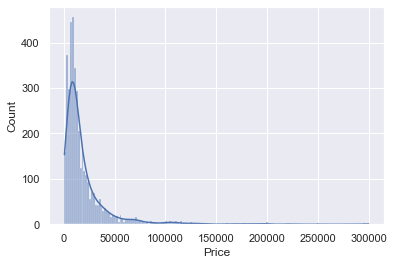

In [10]:
sns.histplot(data_no_mv['Price'],kde=True)
plt.show()

#### Dealing with outliers

In [12]:
q = data_no_mv['Price'].quantile(0.99)
data_1 = data_no_mv[data_no_mv['Price']<=q]
data_1.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3984,3984.000000,3984,3984.000000,3984.000000,3984,3984,3984.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,880,NaN,1528,NaN,NaN,1853,3613,NaN
mean,NaN,17837.117460,NaN,165.116466,2.743770,NaN,NaN,2006.292922
std,NaN,18976.268315,NaN,102.766126,4.956057,NaN,NaN,6.672745
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,6980.000000,NaN,93.000000,1.800000,NaN,NaN,2002.750000
50%,NaN,11400.000000,NaN,160.000000,2.200000,NaN,NaN,2007.000000
75%,NaN,21000.000000,NaN,230.000000,3.000000,NaN,NaN,2011.000000


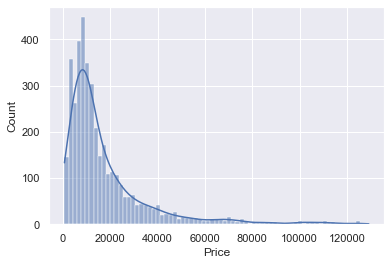

In [11]:
sns.histplot(data_1['Price'], kde=True)
plt.show()

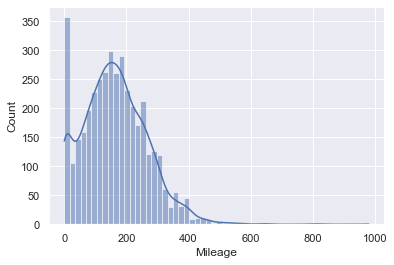

In [13]:
sns.histplot(data_no_mv['Mileage'],kde=True)
plt.show()

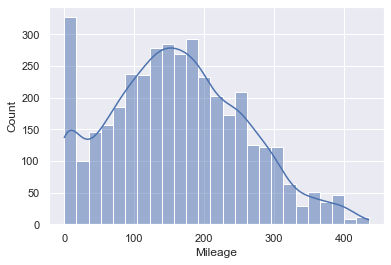

In [14]:
q = data_1['Mileage'].quantile(0.99)
data_2 = data_1[data_1['Mileage']<=q]
sns.histplot(data_2['Mileage'],kde=True)
plt.show()

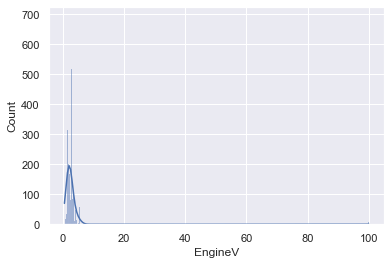

In [15]:
sns.histplot(data_no_mv['EngineV'],kde=True)
plt.show()

Engine volume in a car should fall somewhere in the span of 0.6-6.5 litres. Everything above this is most likely an incorrect entry, and should thus be removed.

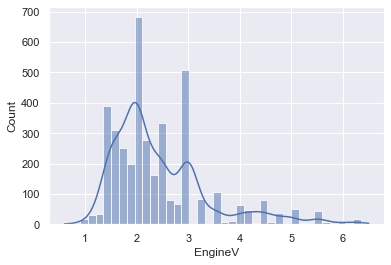

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3922,3922.000000,3922,3922.000000,3922.000000,3922,3922,3922.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,862,NaN,1500,NaN,NaN,1818,3560,NaN
mean,NaN,17992.886272,NaN,161.279449,2.444531,NaN,NaN,2006.406425
std,NaN,19041.283610,NaN,96.056020,0.948292,NaN,NaN,6.595079
min,NaN,600.000000,NaN,0.000000,0.600000,NaN,NaN,1969.000000
25%,NaN,7000.000000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11500.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21500.000000,NaN,229.000000,3.000000,NaN,NaN,2012.000000


In [16]:
data_3 = data_2[data_2['EngineV']<=6.5]
sns.histplot(data_3['EngineV'], kde=True)
plt.show()
data_3.describe(include='all')

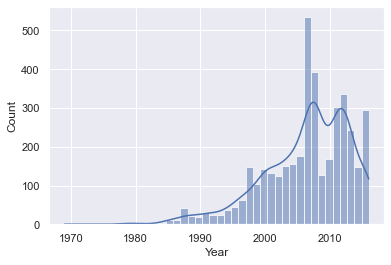

In [17]:
sns.histplot(data_no_mv['Year'],kde=True)
plt.show()

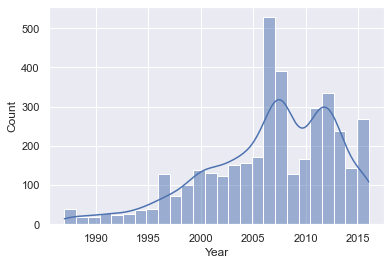

In [18]:
q = data_3['Year'].quantile(0.01)
data_4 = data_3[data_3['Year']>=q]
sns.histplot(data_4['Year'],kde=True)
plt.show()

In [19]:
data_cleaned = data_4.reset_index(drop=True)
data_cleaned.describe(include='all')

,Brand,Price,Body,Mileage,EngineV,Engine Type,Registration,Year
count,3886,3886.000000,3886,3886.000000,3886.000000,3886,3886,3886.000000
unique,7,NaN,6,NaN,NaN,4,2,NaN
top,Volkswagen,NaN,sedan,NaN,NaN,Diesel,yes,NaN
freq,853,NaN,1477,NaN,NaN,1808,3524,NaN
mean,NaN,18125.889529,NaN,161.022131,2.448649,NaN,NaN,2006.618888
std,NaN,19071.313150,NaN,95.790930,0.950406,NaN,NaN,6.234346
min,NaN,800.000000,NaN,0.000000,0.600000,NaN,NaN,1987.000000
25%,NaN,7177.250000,NaN,92.000000,1.800000,NaN,NaN,2003.000000
50%,NaN,11600.000000,NaN,158.000000,2.200000,NaN,NaN,2008.000000
75%,NaN,21537.500000,NaN,226.750000,3.000000,NaN,NaN,2012.000000


## Checking the OLS assumptions

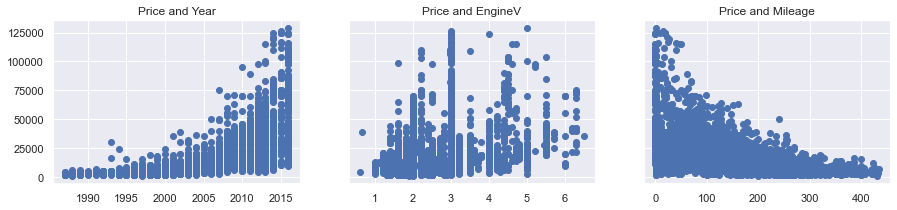

In [20]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['Price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['Price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['Price'])
ax3.set_title('Price and Mileage')

plt.show()

We can see some patterns, but definetly not linear ones. Most likely need to transform one or more variables.

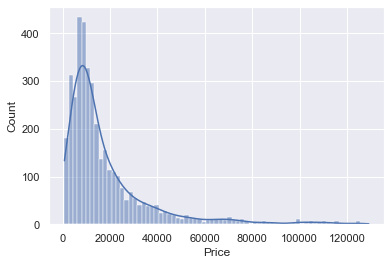

In [21]:
sns.histplot(data_cleaned['Price'],kde=True)
plt.show()

Price distrubution seems quite exponential. We start by performing log transformation and re-evaluate the relationships.

### Relaxing the assumptions

In [22]:
log_price = np.log(data_cleaned['Price'])
data_cleaned['log_price'] = log_price

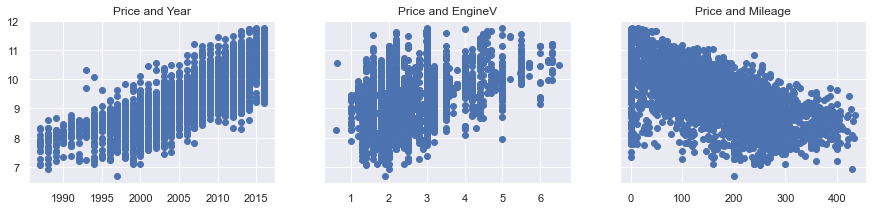

In [23]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, sharey=True, figsize=(15,3))
ax1.scatter(data_cleaned['Year'],data_cleaned['log_price'])
ax1.set_title('Price and Year')
ax2.scatter(data_cleaned['EngineV'],data_cleaned['log_price'])
ax2.set_title('Price and EngineV')
ax3.scatter(data_cleaned['Mileage'],data_cleaned['log_price'])
ax3.set_title('Price and Mileage')

plt.show()

Linear patterns in all plots become much clearer now. Lets drop the price variable since it is no longer interesting

In [24]:
data_cleaned = data_cleaned.drop(['Price'],axis=1)
data_cleaned.describe(include='all')

,Brand,Body,Mileage,EngineV,Engine Type,Registration,Year,log_price
count,3886,3886,3886.000000,3886.000000,3886,3886,3886.000000,3886.000000
unique,7,6,NaN,NaN,4,2,NaN,NaN
top,Volkswagen,sedan,NaN,NaN,Diesel,yes,NaN,NaN
freq,853,1477,NaN,NaN,1808,3524,NaN,NaN
mean,NaN,NaN,161.022131,2.448649,NaN,NaN,2006.618888,9.408219
std,NaN,NaN,95.790930,0.950406,NaN,NaN,6.234346,0.882306
min,NaN,NaN,0.000000,0.600000,NaN,NaN,1987.000000,6.684612
25%,NaN,NaN,92.000000,1.800000,NaN,NaN,2003.000000,8.878670
50%,NaN,NaN,158.000000,2.200000,NaN,NaN,2008.000000,9.358760
75%,NaN,NaN,226.750000,3.000000,NaN,NaN,2012.000000,9.977550


### Multicollinearity

In [25]:
data_cleaned.columns.values

array(['Brand', 'Body', 'Mileage', 'EngineV', 'Engine Type',
       'Registration', 'Year', 'log_price'], dtype=object)

It is not unreasonable to assume some sort of correlation between year and mileage. Let us evaluate that through VIF.

In [36]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
variables = data_cleaned[['Mileage', 'EngineV', 'Year']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
vif

,VIF,features
0,3.798328,Mileage
1,7.638434,EngineV
2,10.368240,Year


VIF = 1: no multicollinearity <br>
1 < VIF < 5: perfectly ok <br>
5 < VIF < 10: debatable <br>
10 < VIF: not acceptable

We create a heatmap of the correlation matrix as well to evaluate any potential bivariate relationships which may explain the high VIF for the year column.

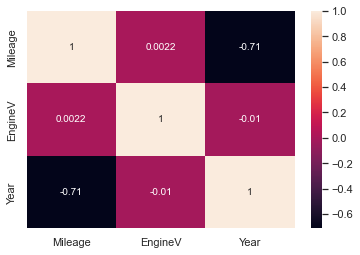

In [29]:
corr_matrix = variables.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

There is a pretty strong negative correlation between Year and Mileage, which makes sense. The older a car is, the more likely it is to have driven a greater amount of miles. <br>
Since only one variable has a high VIF we can easily create two data sets, one where we drop the Year variable and one where we keep it, for comparison in the regression models.

In [31]:
data_no_multicollinearity = data_cleaned.drop(['Year'],axis= 1)
data_with_year = data_cleaned
data_no_multicollinearity.head()

,Brand,Body,Mileage,EngineV,Engine Type,Registration,log_price
0,BMW,sedan,277,2.0,Petrol,yes,8.342840
1,Mercedes-Benz,van,427,2.9,Diesel,yes,8.974618
2,Mercedes-Benz,sedan,358,5.0,Gas,yes,9.495519
3,Audi,crossover,240,4.2,Petrol,yes,10.043249
4,Toyota,crossover,120,2.0,Petrol,yes,9.814656


## Create dummy variables

In [33]:
data_with_dummies = pd.get_dummies(data_no_multicollinearity, drop_first = True)
data_with_dummies_and_year = pd.get_dummies(data_with_year, drop_first = True)
data_with_dummies.head()

,Mileage,EngineV,log_price,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,277,2.0,8.342840,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,427,2.9,8.974618,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,358,5.0,9.495519,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,240,4.2,10.043249,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,120,2.0,9.814656,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [37]:
variables = data_with_dummies[['Brand_BMW','Brand_Mercedes-Benz','Brand_Mitsubishi','Brand_Renault','Brand_Toyota','Brand_Volkswagen','Body_hatch','Body_other','Body_sedan','Body_vagon','Body_van','Engine Type_Gas','Engine Type_Other','Engine Type_Petrol','Registration_yes']]
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(variables.values,i) for i in range(variables.shape[1])]
vif['features'] = variables.columns
#vif

### Rearrange columns
We want log_price as the first column as it is our dependent variable

In [178]:
data_with_dummies.columns.values

array(['Mileage', 'EngineV', 'Year', 'log_price', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes'],
      dtype=object)

In [179]:
cols = ['log_price', 'Mileage', 'EngineV', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
data_preprocessed = data_with_dummies[cols]
data_preprocessed.head()

,log_price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1991,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,1999,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,2003,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,2011,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


In [38]:
cols = ['log_price', 'Mileage', 'EngineV', 'Year', 'Brand_BMW',
       'Brand_Mercedes-Benz', 'Brand_Mitsubishi', 'Brand_Renault',
       'Brand_Toyota', 'Brand_Volkswagen', 'Body_hatch', 'Body_other',
       'Body_sedan', 'Body_vagon', 'Body_van', 'Engine Type_Gas',
       'Engine Type_Other', 'Engine Type_Petrol', 'Registration_yes']
data_preprocessed_with_year = data_with_dummies_and_year[cols]
data_preprocessed_with_year.head()

,log_price,Mileage,EngineV,Year,Brand_BMW,Brand_Mercedes-Benz,Brand_Mitsubishi,Brand_Renault,Brand_Toyota,Brand_Volkswagen,Body_hatch,Body_other,Body_sedan,Body_vagon,Body_van,Engine Type_Gas,Engine Type_Other,Engine Type_Petrol,Registration_yes
0,8.342840,277,2.0,1991,1,0,0,0,0,0,0,0,1,0,0,0,0,1,1
1,8.974618,427,2.9,1999,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1
2,9.495519,358,5.0,2003,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1
3,10.043249,240,4.2,2007,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
4,9.814656,120,2.0,2011,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1


## Save the preprocessed data

In [180]:
data_preprocessed.to_csv('Preprocessed data.csv',index=False)

In [ ]:
data_preprocessed_with_year.to_csv('Preprocessed data (w. year).csv',index=False)